In [23]:
import pandas as pd 
import numpy as np
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [24]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

In [25]:
X_train=train.iloc[:,1:].values
y_train=train.iloc[:,0].values
X_test=test.iloc[:,1:].values
y_test=test.iloc[:,0].values

In [26]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [27]:
X_train /= 255
X_test /= 255

In [28]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [31]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))


Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.2438 - accuracy: 0.9267 - val_loss: 0.1038 - val_accuracy: 0.9686
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1017 - accuracy: 0.9691 - val_loss: 0.0833 - val_accuracy: 0.9721
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0709 - accuracy: 0.9785 - val_loss: 0.0708 - val_accuracy: 0.9770
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0560 - accuracy: 0.9823 - val_loss: 0.0668 - val_accuracy: 0.9794
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0449 - accuracy: 0.9851 - val_loss: 0.0645 - val_accuracy: 0.9801
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0375 - accuracy: 0.9875 - val_loss: 0.0749 - val_accuracy: 0.9778
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0342 - accuracy: 0.9882 - val_loss: 0.0744 - val_accuracy: 0.9787
Epoch 

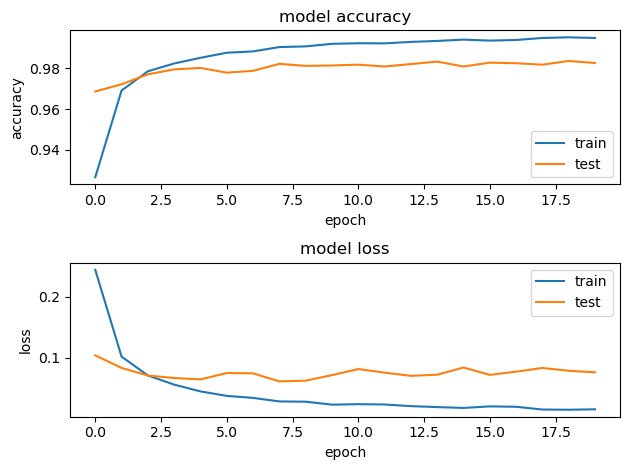

In [34]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
